In [1]:
import pathlib
import sqlite3
import logging
import datetime
import os
import sys
import time
import pandas as pd
import numpy as np
import seaborn as sns

## First read the data from sql

In [2]:
#SQL Connection
sqlite_database_filename ='data.db'
con = sqlite3.connect(sqlite_database_filename, detect_types=sqlite3.PARSE_DECLTYPES | sqlite3.PARSE_COLNAMES)

In [3]:
statement = f'SELECT * from data_table order by timestamp;'
df_data_table = pd.read_sql_query(statement, con)
df_data_table.tail()

,timestamp,sim_time_s,source_system,data_type,data_label,value
115,2022-02-07 15:45:07.358012,14.0,amr_wind,wind_direction,wind_direction,270.000000
116,2022-02-07 15:45:07.358012,14.0,amr_wind,turbine_power,t0,1724.842100
117,2022-02-07 15:45:07.358012,14.0,amr_wind,turbine_power,t1,1697.395646
118,2022-02-07 15:45:07.358012,14.0,amr_wind,turbine_power,t2,1297.539206
119,2022-02-07 15:45:07.358012,14.0,amr_wind,turbine_power,t3,1267.193014


In [4]:
statement = f'SELECT * from front_end_table order by timestamp;'
df_front_end_table = pd.read_sql_query(statement, con)
df_front_end_table.tail()

,timestamp,data_type,data_label,value
55,2022-02-07 15:45:05.592754,wind_direction,wind_direction,270.0
56,2022-02-07 15:45:06.094197,wind_speed,wind_speed,11.9
57,2022-02-07 15:45:06.094197,wind_direction,wind_direction,270.0
58,2022-02-07 15:45:06.591146,wind_speed,wind_speed,11.9
59,2022-02-07 15:45:06.591146,wind_direction,wind_direction,270.0


In [5]:
## Stich together
df_front_end_table['source_system'] = 'front_end'

In [6]:
df = df_data_table.append(df_front_end_table).sort_values('timestamp')
df.head()

,timestamp,sim_time_s,source_system,data_type,data_label,value
0,2022-02-07 15:44:52.116220,NaN,front_end,wind_speed,wind_speed,8.000000
1,2022-02-07 15:44:52.116220,NaN,front_end,wind_direction,wind_direction,270.000000
2,2022-02-07 15:44:52.720328,NaN,front_end,wind_speed,wind_speed,8.000000
3,2022-02-07 15:44:52.720328,NaN,front_end,wind_direction,wind_direction,270.000000
7,2022-02-07 15:44:52.958915,0.0,amr_wind,turbine_power,t3,402.036799


In [7]:
df['timestamp'] = pd.to_datetime(df.timestamp)
df = df.reset_index(drop=True)

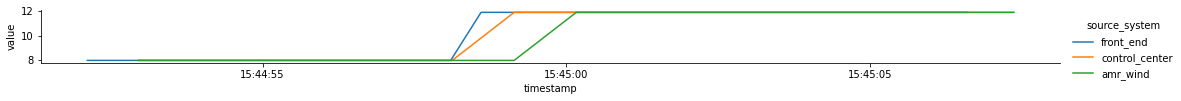

In [8]:
## Consider wind speed stuff
df_sub = df[df.data_type=='wind_speed'].reset_index(drop=True)
g = sns.relplot(data=df_sub,kind='line',x='timestamp',y='value',hue='source_system',aspect=10,height=1.5)

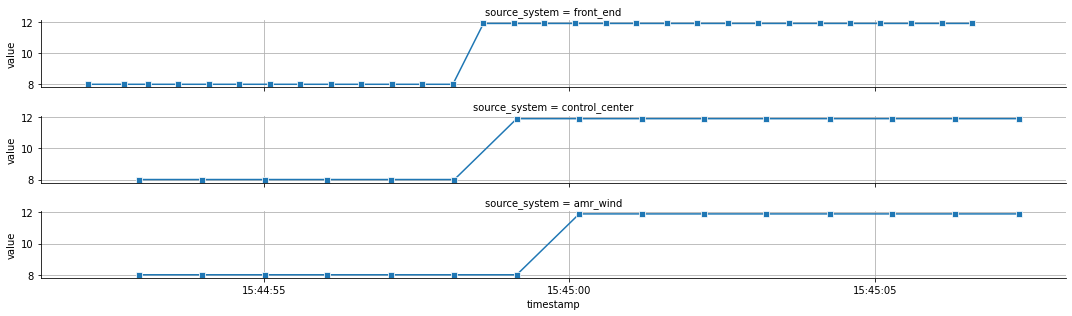

In [9]:
## Consider wind speed stuff
df_sub = df[df.data_type=='wind_speed'].reset_index(drop=True)
g = sns.relplot(data=df_sub,kind='line',x='timestamp',y='value',row='source_system',aspect=10,height=1.5,marker='s')
for ax in g.axes.flatten():
    ax.grid(True)

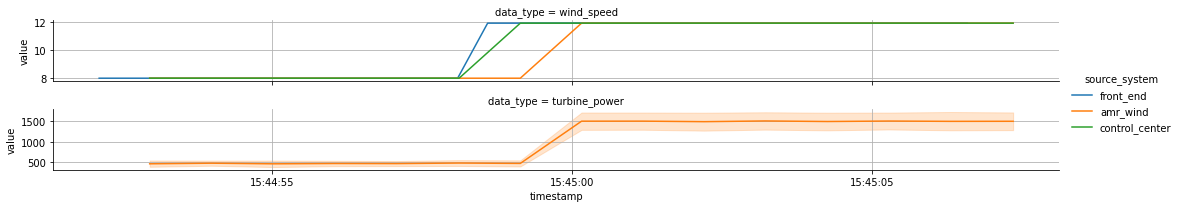

In [10]:
## Show some stuff together
## Consider wind speed stuff
df_sub = df[df.data_type.isin(['wind_speed','turbine_power'])].reset_index(drop=True)
g = sns.relplot(data=df_sub,kind='line',x='timestamp',y='value',hue='source_system',row='data_type',
                aspect=10,height=1.5,
               facet_kws = {'sharey':False})
for ax in g.axes.flatten():
    ax.grid(True)

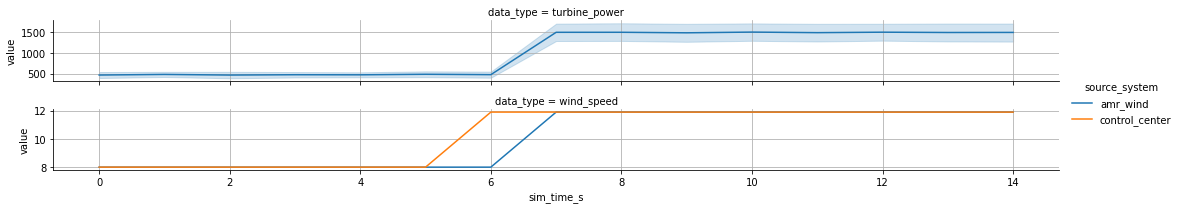

In [11]:
df_sub = df[df.data_type.isin(['wind_speed','turbine_power'])].reset_index(drop=True).dropna()
g = sns.relplot(data=df_sub,kind='line',x='sim_time_s',y='value',hue='source_system',row='data_type',
                aspect=10,height=1.5,
               facet_kws = {'sharey':False})
for ax in g.axes.flatten():
    ax.grid(True)